In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

DATASET_PATH = '/kaggle/input/stanford-rna-3d-folding-2/'
print(os.listdir(DATASET_PATH))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['MSA', 'sample_submission.csv', 'validation_sequences.csv', 'test_sequences.csv', 'validation_labels.csv', 'extra', 'train_labels.csv', 'train_sequences.csv', 'PDB_RNA']


In [2]:
train_seq = pd.read_csv(DATASET_PATH + 'train_sequences.csv')
train_lbl = pd.read_csv(DATASET_PATH + 'train_labels.csv')
test_seq = pd.read_csv(DATASET_PATH + 'test_sequences.csv')
sample_sub = pd.read_csv(DATASET_PATH + 'sample_submission.csv')
print("train sequences:", train_seq.shape)
print("test sequences:", test_seq.shape)
print("train label:", train_lbl.shape)
print("sample submission:", sample_sub.shape)
train_seq.head()

/tmp/ipykernel_17/4233659808.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_lbl = pd.read_csv(DATASET_PATH + 'train_labels.csv')


train sequences: (5716, 8)
test sequences: (28, 8)
train label: (7794971, 8)
sample submission: (9762, 18)


,target_id,sequence,temporal_cutoff,description,stoichiometry,all_sequences,ligand_ids,ligand_SMILES
0,4TNA,GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGG...,1978-04-12,FURTHER REFINEMENT OF THE STRUCTURE OF YEAST T...,A:1,>4TNA_1|Chain A[auth A]|TRNAPHE|\nGCGGAUUUAGCU...,MG,[Mg+2]
1,6TNA,GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGG...,1979-01-16,CRYSTAL STRUCTURE OF YEAST PHENYLALANINE T-RNA...,A:1,>6TNA_1|Chain A[auth A]|TRNAPHE|\nGCGGAUUUAGCU...,MG,[Mg+2]
2,1TRA,GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGG...,1986-07-14,RESTRAINED REFINEMENT OF THE MONOCLINIC FORM O...,A:1,>1TRA_1|Chain A[auth A]|TRNAPHE|\nGCGGAUUUAGCU...,MG,[Mg+2]
3,1TN2,GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGG...,1986-10-24,CRYSTALLOGRAPHIC AND BIOCHEMICAL INVESTIGATION...,A:1,>1TN2_1|Chain A[auth A]|TRNAPHE|\nGCGGAUUUAGCU...,MG;PB;SPM,[Mg+2];[Pb+2];C(CCNCCCN)CNCCCN
4,1TN1,GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGG...,1987-01-15,CRYSTALLOGRAPHIC AND BIOCHEMICAL INVESTIGATION...,A:1,>1TN1_1|Chain A[auth A]|TRNAPHE|\nGCGGAUUUAGCU...,MG;PB;SPM,[Mg+2];[Pb+2];C(CCNCCCN)CNCCCN


In [3]:
train_lbl.head()

,ID,resname,resid,x_1,y_1,z_1,chain,copy
0,157D_1,C,1,4.843,-5.640,13.265,A,1
1,157D_2,G,2,3.385,-7.613,8.267,A,1
2,157D_3,C,3,2.158,-6.751,2.949,A,1
3,157D_4,G,4,2.669,-4.843,-1.773,A,1
4,157D_5,A,5,3.509,0.239,-4.045,A,1


In [4]:
# Pick first RNA target
example_id = train_lbl['ID'].iloc[0].split('_')[0]
example_id

'157D'

In [5]:
rna_df = train_lbl[train_lbl['ID'].str.startswith(example_id)]

rna_df = rna_df.sort_values('resid')

rna_df[['resname', 'resid', 'x_1', 'y_1', 'z_1']].head()


,resname,resid,x_1,y_1,z_1
0,C,1,4.843,-5.640,13.265
1,G,2,3.385,-7.613,8.267
2,C,3,2.158,-6.751,2.949
3,G,4,2.669,-4.843,-1.773
4,A,5,3.509,0.239,-4.045


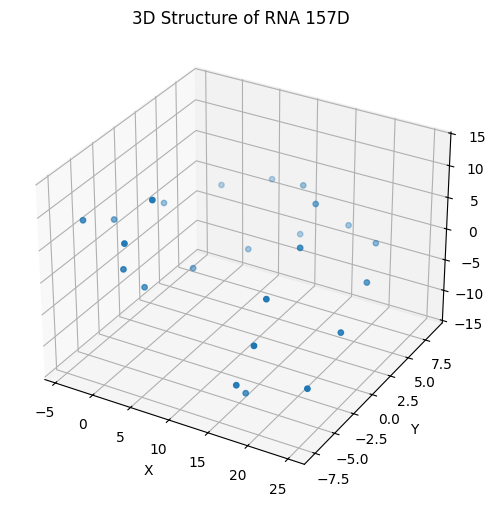

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    rna_df['x_1'],
    rna_df['y_1'],
    rna_df['z_1'],
    s=15
)

ax.set_title(f"3D Structure of RNA {example_id}")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()


In [7]:
sample_sub.head()


,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
0,8ZNQ_1,A,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8ZNQ_2,C,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8ZNQ_3,C,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8ZNQ_4,G,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8ZNQ_5,U,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
submission = sample_sub.copy()
coord_cols = [c for c in submission.columns if c.startswith(('x_', 'y_', 'z_'))]
np.random.seed(42)
submission[coord_cols] = np.random.normal(loc=0.0, scale=10.0, size=(len(submission), len(coord_cols)))

In [9]:
submission_path = '/kaggle/working/submission.csv'
submission.to_csv(submission_path, index=False)

submission_path


'/kaggle/working/submission.csv'

In [10]:
print("Files in /kaggle/working:")
print(os.listdir('/kaggle/working'))



Files in /kaggle/working:
['__notebook__.ipynb', 'submission.csv']
